In [2]:
import pandas as pd
import numpy as np

In [1]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv 

--2022-07-08 04:48:23--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178509 (174K) [text/plain]
Saving to: ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’

BTC_USD_2013-10-01_ 100%[===================>] 174.33K  --.-KB/s    in 0.03s   

2022-07-08 04:48:24 (6.00 MB/s) - ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’ saved [178509/178509]



In [3]:
df = pd.read_csv("/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv", 
                 parse_dates=["Date"], 
                 index_col=["Date"]) # parse the date column (tell pandas column 1 is a datetime)
df.head()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2787 entries, 2013-10-01 to 2021-05-18
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2787 non-null   object 
 1   Closing Price (USD)  2787 non-null   float64
 2   24h Open (USD)       2787 non-null   float64
 3   24h High (USD)       2787 non-null   float64
 4   24h Low (USD)        2787 non-null   float64
dtypes: float64(4), object(1)
memory usage: 130.6+ KB


In [5]:
len(df)

2787

In [6]:
#Important factors in the types of time series 
# - Trend
# - Seasnal
# - Cyclic

In [7]:
bitcoin_prices = pd.DataFrame(df["Closing Price (USD)"]).rename(columns={"Closing Price (USD)": "Price"})
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


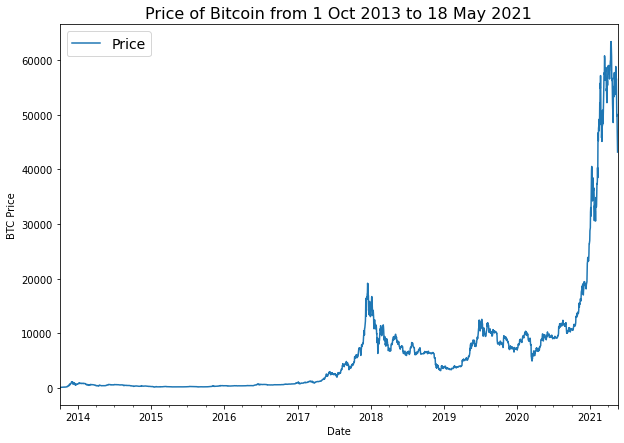

In [8]:
import matplotlib.pyplot as plt
bitcoin_prices.plot(figsize=(10, 7))
plt.ylabel("BTC Price")
plt.title("Price of Bitcoin from 1 Oct 2013 to 18 May 2021", fontsize=16)
plt.legend(fontsize=14);

In [11]:
#Creating train and test sets for time series data
# Get bitcoin date array
timesteps = bitcoin_prices.index.to_numpy()
prices = bitcoin_prices["Price"].to_numpy()

timesteps[:10], prices[:10]

(array(['2013-10-01T00:00:00.000000000', '2013-10-02T00:00:00.000000000',
        '2013-10-03T00:00:00.000000000', '2013-10-04T00:00:00.000000000',
        '2013-10-05T00:00:00.000000000', '2013-10-06T00:00:00.000000000',
        '2013-10-07T00:00:00.000000000', '2013-10-08T00:00:00.000000000',
        '2013-10-09T00:00:00.000000000', '2013-10-10T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  , 123.033  , 124.049  , 125.96116]))

#seq based train test split 

In [12]:
# Create train and test splits the right way for time series data
split_size = int(0.8 * len(prices)) # 80% train, 20% test

# Create train data splits (everything before the split)
X_train, y_train = timesteps[:split_size], prices[:split_size]

# Create test data splits (everything after the split)
X_test, y_test = timesteps[split_size:], prices[split_size:]

len(X_train), len(X_test), len(y_train), len(y_test)

(2229, 558, 2229, 558)

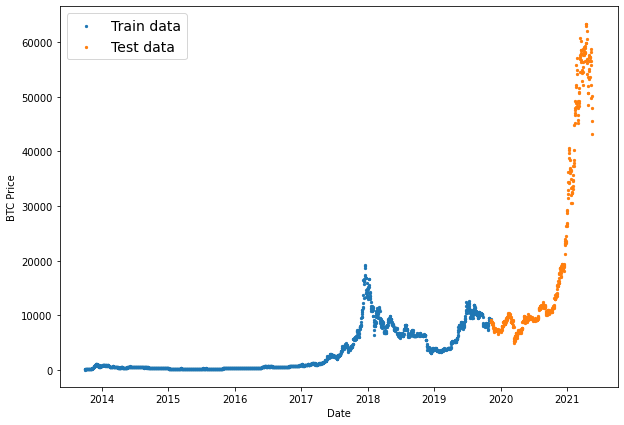

In [13]:
# Plot correctly made splits
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, s=5, label="Train data")
plt.scatter(X_test, y_test, s=5, label="Test data")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.legend(fontsize=14)
plt.show();

In [21]:
"""x = [1,2,3,4,5]
print(x[1:None])"""
#works

'x = [1,2,3,4,5]\nprint(x[1:None])'

In [15]:
# Create a function to plot time series data
def plot_time_series(timesteps, values, format='.', start=0, end=None, label=None):

  # Plot the series
  plt.plot(timesteps[start:end], values[start:end], format, label=label)
  plt.xlabel("Time")
  plt.ylabel("BTC Price")
  if label:
    plt.legend(fontsize=14) # 

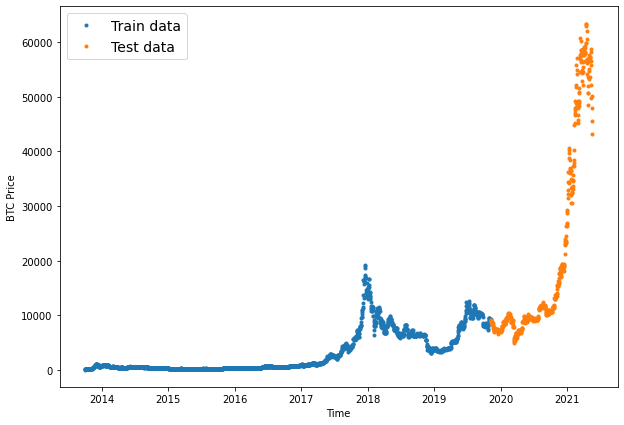

In [16]:
# Try out our plotting function
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, label="Test data")

In [17]:
#horizon is future
#windows is the past

In [ ]:
#Using Naive Forecast.
#y_(t) = y_(t-1)

In [22]:
# Create a naïve forecast
naive_forecast = y_test[:-1] # Naïve forecast equals every value excluding the last value
naive_forecast[:10], naive_forecast[-10:] # View frist 10 and last 10 

(array([9226.48582088, 8794.35864452, 8798.04205463, 9081.18687849,
        8711.53433917, 8760.89271814, 8749.52059102, 8656.97092235,
        8500.64355816, 8469.2608989 ]),
 array([57107.12067189, 58788.20967893, 58102.19142623, 55715.54665129,
        56573.5554719 , 52147.82118698, 49764.1320816 , 50032.69313676,
        47885.62525472, 45604.61575361]))

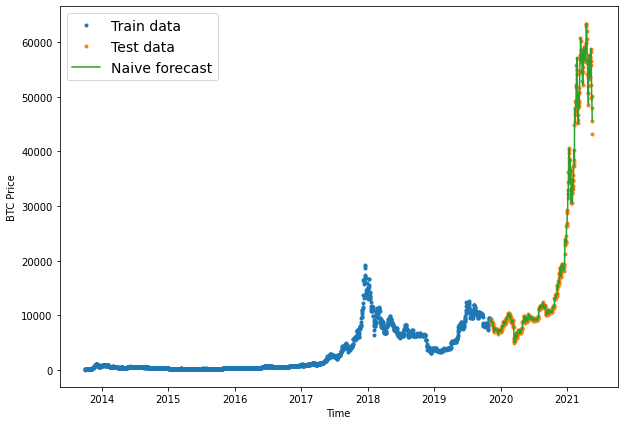

In [23]:
# Plot naive forecast
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, label="Test data")
plot_time_series(timesteps=X_test[1:], values=naive_forecast, format="-", label="Naive forecast");

In [24]:
# Let's get TensorFlow! 
import tensorflow as tf

In [25]:
# MASE implemented courtesy of sktime - https://github.com/alan-turing-institute/sktime/blob/ee7a06843a44f4aaec7582d847e36073a9ab0566/sktime/performance_metrics/forecasting/_functions.py#L16
def mean_absolute_scaled_error(y_true, y_pred):
  """
  Implement MASE (assuming no seasonality of data).
  """
  mae = tf.reduce_mean(tf.abs(y_true - y_pred))

  # Find MAE of naive forecast (no seasonality)
  mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1])) # our seasonality is 1 day (hence the shifting of 1 day)

  return mae / mae_naive_no_season

In [28]:
#This is for metric calculation
def evaluate_preds(y_true, y_pred):
  # Make sure float32 (for metric calculations)
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate various metrics
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred) # puts and emphasis on outliers (all errors get squared)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)
  
  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

In [29]:
naive_results = evaluate_preds(y_true=y_test[1:],
                               y_pred=naive_forecast)
naive_results

{'mae': 567.9802,
 'mape': 2.5165248,
 'mase': 0.99957,
 'mse': 1147547.0,
 'rmse': 1071.2362}

In [30]:
# Find average price of Bitcoin in test dataset
tf.reduce_mean(y_test).numpy()

20056.632963737226

In [31]:
#Format Data Part 2
HORIZON = 1 # predict 1 step at a time
WINDOW_SIZE = 7 # use a week worth of timesteps to predict the horizon

In [32]:
# Create function to label windowed data
def get_labelled_windows(x, horizon=1):
  """
  Creates labels for windowed dataset.

  E.g. if horizon=1 (default)
  Input: [1, 2, 3, 4, 5, 6] -> Output: ([1, 2, 3, 4, 5], [6])
  """
  return x[:, :-horizon], x[:, -horizon:]

In [33]:
# Test out the window labelling function
test_window, test_label = get_labelled_windows(tf.expand_dims(tf.range(8)+1, axis=0), horizon=HORIZON)
print(f"Window: {tf.squeeze(test_window).numpy()} -> Label: {tf.squeeze(test_label).numpy()}")

Window: [1 2 3 4 5 6 7] -> Label: 8


In [34]:
# Create function to view NumPy arrays as windows 
def make_windows(x, window_size=7, horizon=1):
  """
  Turns a 1D array into a 2D array of sequential windows of window_size.
  """
  # 1. Create a window of specific window_size (add the horizon on the end for later labelling)
  window_step = np.expand_dims(np.arange(window_size+horizon), axis=0)
  # print(f"Window step:\n {window_step}")

  # 2. Create a 2D array of multiple window steps (minus 1 to account for 0 indexing)
  window_indexes = window_step + np.expand_dims(np.arange(len(x)-(window_size+horizon-1)), axis=0).T # create 2D array of windows of size window_size
  # print(f"Window indexes:\n {window_indexes[:3], window_indexes[-3:], window_indexes.shape}")

  # 3. Index on the target array (time series) with 2D array of multiple window steps
  windowed_array = x[window_indexes]

  # 4. Get the labelled windows
  windows, labels = get_labelled_windows(windowed_array, horizon=horizon)

  return windows, labels

In [35]:
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2780, 2780)

In [36]:
# View the first 3 windows/labels
for i in range(3):
  print(f"Window: {full_windows[i]} -> Label: {full_labels[i]}")

Window: [123.65499 125.455   108.58483 118.67466 121.33866 120.65533 121.795  ] -> Label: [123.033]
Window: [125.455   108.58483 118.67466 121.33866 120.65533 121.795   123.033  ] -> Label: [124.049]
Window: [108.58483 118.67466 121.33866 120.65533 121.795   123.033   124.049  ] -> Label: [125.96116]


In [37]:
# Make the train/test splits
def make_train_test_splits(windows, labels, test_split=0.2):
  """
  Splits matching pairs of windows and labels into train and test splits.
  """
  split_size = int(len(windows) * (1-test_split)) # this will default to 80% train/20% test
  train_windows = windows[:split_size]
  train_labels = labels[:split_size]
  test_windows = windows[split_size:]
  test_labels = labels[split_size:]
  return train_windows, test_windows, train_labels, test_labels

In [38]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2224, 556, 2224, 556)

In [39]:
train_windows[:5], train_labels[:5]

(array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
         121.795  ],
        [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
         123.033  ],
        [108.58483, 118.67466, 121.33866, 120.65533, 121.795  , 123.033  ,
         124.049  ],
        [118.67466, 121.33866, 120.65533, 121.795  , 123.033  , 124.049  ,
         125.96116],
        [121.33866, 120.65533, 121.795  , 123.033  , 124.049  , 125.96116,
         125.27966]]), array([[123.033  ],
        [124.049  ],
        [125.96116],
        [125.27966],
        [125.9275 ]]))

In [40]:
# Check to see if same (accounting for horizon and window size)
np.array_equal(np.squeeze(train_labels[:-HORIZON-1]), y_train[WINDOW_SIZE:])

True

In [41]:
import os
# Create a function to implement a ModelCheckpoint callback with a specific filename 
def create_model_checkpoint(model_name, save_path="model_experiments"):
  return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path, model_name), # create filepath to save model
                                            verbose=0, # only output a limited amount of text
                                            save_best_only=True) # save only the best model to file

# Model 1: Dense Model(window = 7,horizon =1)

In [42]:
import tensorflow as tf
from tensorflow.keras import layers
tf.random.set_seed(42)
model_1 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON, activation="linear") # linear activation is the same as having no activation                        
], name="model_1_dense") 

In [43]:
model_1.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

In [44]:
# Fit model
model_1.fit(x=train_windows, # train windows of 7 timesteps of Bitcoin prices
            y=train_labels, # horizon value of 1 (using the previous 7 timesteps to predict next day)
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_1.name)]) 

Epoch 1/100
18/18 [==============================] - 2s 81ms/step - loss: 780.3469 - mae: 780.3469 - val_loss: 2279.5828 - val_mae: 2279.5828
Epoch 2/100
18/18 [==============================] - 1s 50ms/step - loss: 247.6765 - mae: 247.6765 - val_loss: 1005.9864 - val_mae: 1005.9864
Epoch 3/100
18/18 [==============================] - 1s 52ms/step - loss: 188.4107 - mae: 188.4107 - val_loss: 923.2859 - val_mae: 923.2859
Epoch 4/100
18/18 [==============================] - 1s 49ms/step - loss: 169.4334 - mae: 169.4334 - val_loss: 900.5932 - val_mae: 900.5932
Epoch 5/100
18/18 [==============================] - 1s 68ms/step - loss: 165.0900 - mae: 165.0900 - val_loss: 895.2405 - val_mae: 895.2405
Epoch 6/100
18/18 [==============================] - 1s 76ms/step - loss: 158.5206 - mae: 158.5206 - val_loss: 855.1868 - val_mae: 855.1868
Epoch 7/100
18/18 [==============================] - 1s 81ms/step - loss: 151.3568 - mae: 151.3568 - val_loss: 840.9290 - val_mae: 840.9290
Epoch 8/100
18/1

In [45]:
# Evaluate model on test data
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 662.5322 - mae: 662.5322


[662.5322265625, 662.5322265625]

In [46]:
# Load in saved best performing model_1 and evaluate on test data
model_1 = tf.keras.models.load_model("model_experiments/model_1_dense")
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 568.5499 - mae: 568.5499


[568.5498657226562, 568.5498657226562]

In [47]:
def make_preds(model, input_data):
  """
  Uses model to make predictions on input_data.

  Parameters
  ----------
  model: trained model 
  input_data: windowed input data (same kind of data model was trained on)

  Returns model predictions on input_data.
  """
  forecast = model.predict(input_data)
  return tf.squeeze(forecast) # return 1D array of predictions

In [48]:
# Make predictions using model_1 on the test dataset and view the results
model_1_preds = make_preds(model_1, test_windows)
len(model_1_preds), model_1_preds[:10]

(556, <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([8874.493, 8789.944, 9040.986, 8804.829, 8741.21 , 8749.835,
        8705.865, 8513.171, 8478.415, 8536.302], dtype=float32)>)

In [49]:
# Evaluate preds
model_1_results = evaluate_preds(y_true=tf.squeeze(test_labels), # reduce to right shape
                                 y_pred=model_1_preds)
model_1_results

{'mae': 568.5498,
 'mape': 2.549229,
 'mase': 0.99878454,
 'mse': 1172587.6,
 'rmse': 1082.8608}

In [50]:
naive_results

{'mae': 567.9802,
 'mape': 2.5165248,
 'mase': 0.99957,
 'mse': 1147547.0,
 'rmse': 1071.2362}

In [ ]:
#-----------------------------------------------------------------------------------

In [51]:
model_2 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(256, activation="relu"),
  layers.Dense(512, activation="relu"),
  layers.Dense(HORIZON, activation="linear") # linear activation is the same as having no activation                        
], name="model_1_dense") 

In [53]:
model_2.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

In [54]:
# Fit model
model_2.fit(x=train_windows, # train windows of 7 timesteps of Bitcoin prices
            y=train_labels, # horizon value of 1 (using the previous 7 timesteps to predict next day)
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_1.name)]) 

Epoch 1/100
18/18 [==============================] - 3s 121ms/step - loss: 757.1804 - mae: 757.1804 - val_loss: 1014.0330 - val_mae: 1014.0330
Epoch 2/100
18/18 [==============================] - 1s 86ms/step - loss: 196.0182 - mae: 196.0182 - val_loss: 905.7249 - val_mae: 905.7249
Epoch 3/100
18/18 [==============================] - 0s 13ms/step - loss: 140.8831 - mae: 140.8831 - val_loss: 1057.7394 - val_mae: 1057.7394
Epoch 4/100
18/18 [==============================] - 1s 83ms/step - loss: 136.3517 - mae: 136.3517 - val_loss: 626.4918 - val_mae: 626.4918
Epoch 5/100
18/18 [==============================] - 0s 9ms/step - loss: 121.1806 - mae: 121.1806 - val_loss: 640.3235 - val_mae: 640.3235
Epoch 6/100
18/18 [==============================] - 1s 51ms/step - loss: 114.6907 - mae: 114.6907 - val_loss: 623.6500 - val_mae: 623.6500
Epoch 7/100
18/18 [==============================] - 0s 9ms/step - loss: 127.3175 - mae: 127.3175 - val_loss: 626.5867 - val_mae: 626.5867
Epoch 8/100
18/18

In [56]:
# Make predictions using model_1 on the test dataset and view the results
model_2_preds = make_preds(model_2, test_windows)
len(model_2_preds), model_2_preds[:10]

(556, <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([8756.538, 8711.394, 8964.399, 8698.272, 8684.409, 8660.753,
        8585.673, 8444.117, 8391.974, 8448.864], dtype=float32)>)

In [57]:
# Evaluate preds
model_2_results = evaluate_preds(y_true=tf.squeeze(test_labels), # reduce to right shape
                                 y_pred=model_2_preds)
model_2_results

{'mae': 599.0102,
 'mape': 2.7185428,
 'mase': 1.052295,
 'mse': 1213744.8,
 'rmse': 1101.7008}

In [58]:
naive_results

{'mae': 567.9802,
 'mape': 2.5165248,
 'mase': 0.99957,
 'mse': 1147547.0,
 'rmse': 1071.2362}

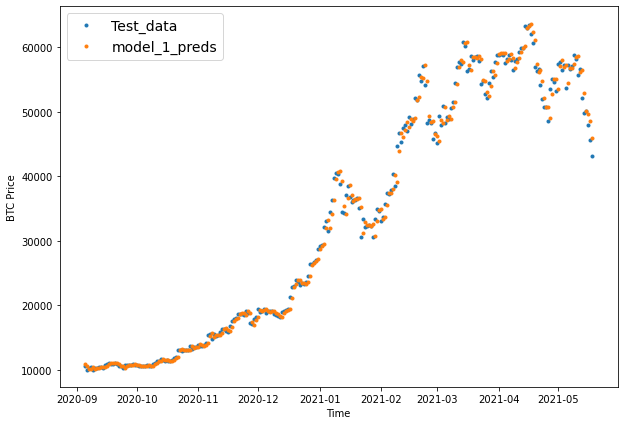

In [60]:
offset = 300
plt.figure(figsize=(10, 7))
# Account for the test_window offset and index into test_labels to ensure correct plotting
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="Test_data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_1_preds, start=offset, format=".", label="model_1_preds")

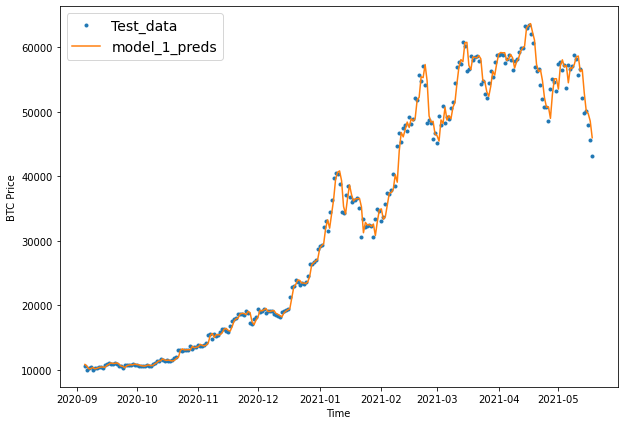

In [61]:
offset = 300
plt.figure(figsize=(10, 7))
# Account for the test_window offset and index into test_labels to ensure correct plotting
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="Test_data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_1_preds, start=offset, format="-", label="model_1_preds")

In [ ]:
HORIZON = 1 # predict one step at a time
WINDOW_SIZE = 30 # use 30 timesteps in the past

In [62]:
# Make windowed data with appropriate horizon and window sizes
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2780, 2780)

In [63]:
# Make train and testing windows
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows, labels=full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2224, 556, 2224, 556)

In [69]:
tf.random.set_seed(42)

# Create model (same model as model 1 but data input will be different)
model_3 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON) # need to predict horizon number of steps into the future
], name="model_3_dense")

model_3.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

model_3.fit(train_windows,
            train_labels,
            epochs=100,
            batch_size=128,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_3.name)])

INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: mod

In [74]:
# Evaluate model 2 preds
model_3.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 1ms/step - loss: 568.5499


568.5498657226562

In [75]:
# Load in best performing model
model_3 = tf.keras.models.load_model("model_experiments/model_3_dense/")
model_3.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 568.5499


568.5498657226562

In [78]:
# Get forecast predictions
model_3_preds = make_preds(model_3,
                           input_data=test_windows)

In [79]:
# Evaluate results for model 2 predictions
model_3_results = evaluate_preds(y_true=tf.squeeze(test_labels), # remove 1 dimension of test labels
                                 y_pred=model_3_preds)
model_3_results

{'mae': 568.5498,
 'mape': 2.549229,
 'mase': 0.99878454,
 'mse': 1172587.6,
 'rmse': 1082.8608}

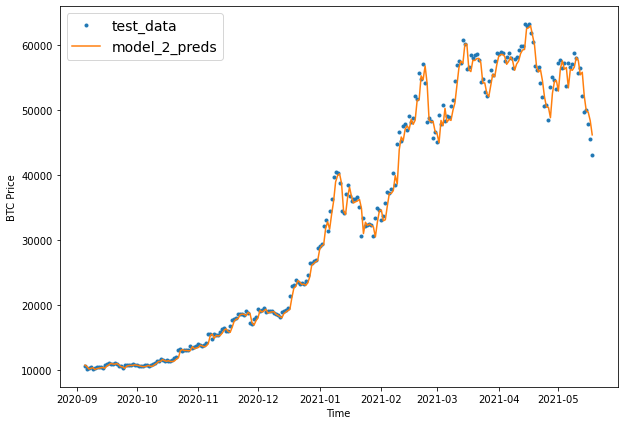

In [80]:
offset = 300
plt.figure(figsize=(10, 7))
# Account for the test_window offset
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="test_data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_2_preds, start=offset, format="-", label="model_2_preds") 

In [81]:
#model 4 : Dense(window:30 , horizon = 7)
HORIZON = 7
WINDOW_SIZE = 30

full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2751, 2751)

In [82]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows, labels=full_labels, test_split=0.2)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2200, 551, 2200, 551)

In [83]:
tf.random.set_seed(42)

# Create model (same as model_1 except with different data input size)
model_4 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON)
], name="model_4_dense")

model_4.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

model_4.fit(train_windows,
            train_labels,
            batch_size=128,
            epochs=100,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_4.name)])

INFO:tensorflow:Assets written to: model_experiments/model_4_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_4_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_4_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_4_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_4_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_4_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_4_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_4_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_4_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_4_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_4_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_4_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_4_dense/assets
INFO:tensorflow:Assets written to: mod

In [ ]:
# How did our model with a larger window size and horizon go?
model_4.evaluate(test_windows, test_labels)

In [84]:
# Load in best version of model_3 and evaluate
model_4 = tf.keras.models.load_model("model_experiments/model_4_dense/")
model_4.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 1228.1417


1228.1417236328125

In [85]:
# The predictions are going to be 7 steps at a time (this is the HORIZON size)
model_4_preds = make_preds(model_4,
                           input_data=test_windows)
model_4_preds[:5]

<tf.Tensor: shape=(5, 7), dtype=float32, numpy=
array([[9233.328 , 9332.702 , 9363.651 , 9442.775 , 9401.978 , 9414.001 ,
        9280.01  ],
       [8911.084 , 9065.984 , 9113.08  , 9026.601 , 8990.093 , 9000.148 ,
        9053.433 ],
       [8848.506 , 9018.2295, 9006.146 , 8934.578 , 8929.888 , 8856.351 ,
        8958.367 ],
       [9048.449 , 9058.819 , 8966.749 , 9127.248 , 8982.123 , 9056.629 ,
        9002.575 ],
       [8958.309 , 9008.146 , 8827.891 , 8995.736 , 9129.433 , 9099.142 ,
        8881.021 ]], dtype=float32)>

In [86]:
# Calculate model_3 results - these are going to be multi-dimensional because
# we're trying to predict more than one step at a time.
model_4_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_4_preds)
model_4_results

{'mae': array([  559.42004 ,   276.0053  ,   298.20258 ,   408.06152 ,
          431.32047 ,   526.28064 ,   542.41644 ,   459.79108 ,
          490.63736 ,   631.6582  ,   802.51654 ,   731.79333 ,
          684.06476 ,   789.71857 ,   563.4593  ,   271.9013  ,
          231.86858 ,   258.64767 ,   277.65277 ,   291.5478  ,
          105.425575,   132.63156 ,   205.97643 ,   262.20816 ,
          169.8651  ,   165.05127 ,   110.21959 ,    83.64655 ,
          115.86182 ,   152.87025 ,   279.98862 ,   380.96127 ,
          280.21414 ,   271.9101  ,   264.43088 ,   261.91315 ,
          330.29108 ,   242.21861 ,   253.72746 ,   245.38596 ,
          412.562   ,   128.63539 ,    88.56452 ,    92.15639 ,
          100.39704 ,   102.41455 ,    74.52804 ,    94.00349 ,
           84.86837 ,    76.64781 ,   108.49679 ,   144.869   ,
          187.69133 ,   162.5261  ,   265.83133 ,   391.21323 ,
          552.2943  ,   541.77313 ,   522.20886 ,   523.98157 ,
          430.13052 ,   276.80893

In [88]:
#this is for horizon and windows seprated.
def evaluate_preds(y_true, y_pred):
  # Make sure float32 (for metric calculations)
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate various metrics
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  # Account for different sized metrics (for longer horizons, reduce to single number)
  if mae.ndim > 0: # if mae isn't already a scalar, reduce it to one by aggregating tensors to mean
    mae = tf.reduce_mean(mae)
    mse = tf.reduce_mean(mse)
    rmse = tf.reduce_mean(rmse)
    mape = tf.reduce_mean(mape)
    mase = tf.reduce_mean(mase)

  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

In [90]:
# Get model_3 results aggregated to single values
model_4_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_4_preds)
model_4_results

{'mae': 1228.1416,
 'mape': 5.4698334,
 'mase': 2.1854093,
 'mse': 5323686.5,
 'rmse': 1412.9114}

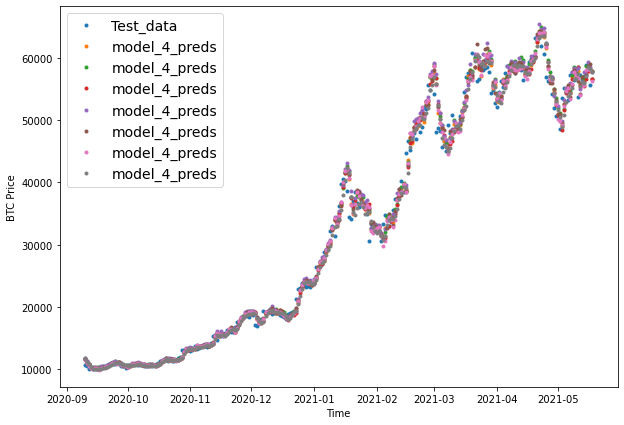

In [92]:
offset = 300
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="Test_data")
# Checking the shape of model_4_preds results in [n_test_samples, HORIZON] (this will screw up the plot)
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_4_preds, start=offset, label="model_4_preds")

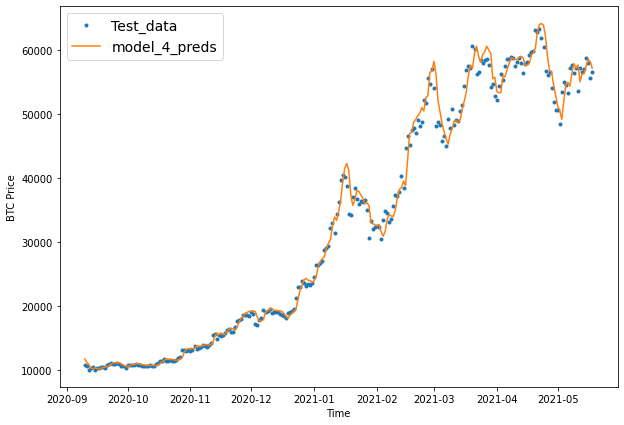

In [94]:
offset = 300
plt.figure(figsize=(10, 7))
# Plot model_3_preds by aggregating them (note: this condenses information so the preds will look fruther ahead than the test data)
plot_time_series(timesteps=X_test[-len(test_windows):], 
                 values=test_labels[:, 0], 
                 start=offset, 
                 label="Test_data")
plot_time_series(timesteps=X_test[-len(test_windows):], 
                 values=tf.reduce_mean(model_4_preds, axis=1), 
                 format="-",
                 start=offset, 
                 label="model_4_preds")

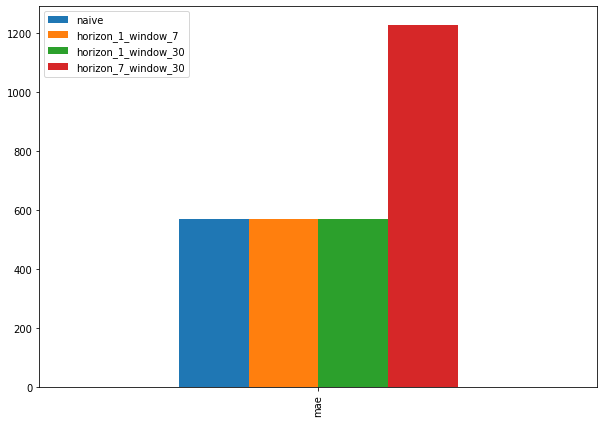

In [95]:
pd.DataFrame({"naive": naive_results["mae"], 
              "horizon_1_window_7": model_1_results["mae"], 
              "horizon_1_window_30": model_2_results["mae"],
              "horizon_1_window_30": model_3_results["mae"], 
              "horizon_7_window_30": model_4_results["mae"]}, index=["mae"]).plot(figsize=(10, 7), kind="bar");

In [96]:
#model 4 
#Using Conv2D
HORIZON = 1 # predict next day
WINDOW_SIZE = 7 # use previous week worth of data

In [97]:
# Create windowed dataset
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2780, 2780)

In [98]:
# Create train/test splits
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2224, 556, 2224, 556)

In [99]:
# Check data sample shapes
train_windows[0].shape # returns (WINDOW_SIZE, )

(7,)

In [100]:
# Before we pass our data to the Conv1D layer, we have to reshape it in order to make sure it works
x = tf.constant(train_windows[0])
expand_dims_layer = layers.Lambda(lambda x: tf.expand_dims(x, axis=1)) # add an extra dimension for timesteps
print(f"Original shape: {x.shape}") # (WINDOW_SIZE)
print(f"Expanded shape: {expand_dims_layer(x).shape}") # (WINDOW_SIZE, input_dim) 
print(f"Original values with expanded shape:\n {expand_dims_layer(x)}")

Original shape: (7,)
Expanded shape: (7, 1)
Original values with expanded shape:
 [[123.65499]
 [125.455  ]
 [108.58483]
 [118.67466]
 [121.33866]
 [120.65533]
 [121.795  ]]


In [101]:
tf.random.set_seed(42)

# Create model
model_5 = tf.keras.Sequential([
  # Create Lambda layer to reshape inputs, without this layer, the model will error
  layers.Lambda(lambda x: tf.expand_dims(x, axis=1)), # resize the inputs to adjust for window size / Conv1D 3D input requirements
  layers.Conv1D(filters=128, kernel_size=5, padding="causal", activation="relu"),
  layers.Dense(HORIZON)
], name="model_5_conv1D")

# Compile model
model_5.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Fit model
model_5.fit(train_windows,
            train_labels,
            batch_size=128, 
            epochs=100,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_5.name)])

INFO:tensorflow:Assets written to: model_experiments/model_5_conv1D/assets
INFO:tensorflow:Assets written to: model_experiments/model_5_conv1D/assets
INFO:tensorflow:Assets written to: model_experiments/model_5_conv1D/assets
INFO:tensorflow:Assets written to: model_experiments/model_5_conv1D/assets
INFO:tensorflow:Assets written to: model_experiments/model_5_conv1D/assets
INFO:tensorflow:Assets written to: model_experiments/model_5_conv1D/assets
INFO:tensorflow:Assets written to: model_experiments/model_5_conv1D/assets
INFO:tensorflow:Assets written to: model_experiments/model_5_conv1D/assets
INFO:tensorflow:Assets written to: model_experiments/model_5_conv1D/assets
INFO:tensorflow:Assets written to: model_experiments/model_5_conv1D/assets
INFO:tensorflow:Assets written to: model_experiments/model_5_conv1D/assets
INFO:tensorflow:Assets written to: model_experiments/model_5_conv1D/assets
INFO:tensorflow:Assets written to: model_experiments/model_5_conv1D/assets
INFO:tensorflow:Assets wr

In [102]:
model_5.summary()

Model: "model_5_conv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_1 (Lambda)           (None, 1, 7)              0         
                                                                 
 conv1d (Conv1D)             (None, 1, 128)            4608      
                                                                 
 dense_16 (Dense)            (None, 1, 1)              129       
                                                                 
Total params: 4,737
Trainable params: 4,737
Non-trainable params: 0
_________________________________________________________________


In [103]:
# Load in best performing Conv1D model and evaluate it on the test data
model_5 = tf.keras.models.load_model("model_experiments/model_5_conv1D")
model_5.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 569.0326


569.0325927734375

In [105]:
# Make predictions
model_5_preds = make_preds(model_5, test_windows)
model_5_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8847.293, 8757.503, 8997.469, 8762.801, 8707.722, 8713.594,
       8664.935, 8496.83 , 8439.473, 8499.395], dtype=float32)>

In [106]:
# Evaluate predictions
model_5_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_5_preds)
model_5_results

{'mae': 569.03265,
 'mape': 2.5515256,
 'mase': 0.9996328,
 'mse': 1169841.0,
 'rmse': 1081.5919}

In [107]:
#model 6

In [108]:
tf.random.set_seed(42)

# Let's build an LSTM model with the Functional API
inputs = layers.Input(shape=(WINDOW_SIZE))
x = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(inputs) # expand input dimension to be compatible with LSTM
# print(x.shape)
# x = layers.LSTM(128, activation="relu", return_sequences=True)(x) # this layer will error if the inputs are not the right shape
x = layers.LSTM(128, activation="relu")(x) # using the tanh loss function results in a massive error
# print(x.shape)
# Add another optional dense layer (you could add more of these to see if they improve model performance)
# x = layers.Dense(32, activation="relu")(x)
output = layers.Dense(HORIZON)(x)
model_6 = tf.keras.Model(inputs=inputs, outputs=output, name="model_6_lstm")

# Compile model
model_6.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Seems when saving the model several warnings are appearing: https://github.com/tensorflow/tensorflow/issues/47554 
model_6.fit(train_windows,
            train_labels,
            epochs=100,
            verbose=0,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_6.name)])

INFO:tensorflow:Assets written to: model_experiments/model_6_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_lstm/assets


In [109]:
# Load in best version of model 5 and evaluate on the test data
model_6 = tf.keras.models.load_model("model_experiments/model_6_lstm/")
model_6.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 591.6655


591.6654663085938

In [111]:
# Make predictions with our LSTM model
model_6_preds = make_preds(model_6, test_windows)
model_6_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8970.957, 8815.352, 9026.793, 8831.478, 8736.686, 8804.464,
       8733.207, 8540.421, 8518.281, 8544.508], dtype=float32)>

In [112]:
# Evaluate model 5 preds
model_6_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_6_preds)
model_6_results

{'mae': 591.6655,
 'mape': 2.66558,
 'mase': 1.0393925,
 'mse': 1250831.5,
 'rmse': 1118.4058}

In [113]:
#making bitcoin multivariate.

In [114]:
# Let's make a multivariate time series
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [115]:
# Block reward values
block_reward_1 = 50 # 3 January 2009 (2009-01-03) - this block reward isn't in our dataset (it starts from 01 October 2013)
block_reward_2 = 25 # 28 November 2012 
block_reward_3 = 12.5 # 9 July 2016
block_reward_4 = 6.25 # 11 May 2020

# Block reward dates (datetime form of the above date stamps)
block_reward_2_datetime = np.datetime64("2012-11-28")
block_reward_3_datetime = np.datetime64("2016-07-09")
block_reward_4_datetime = np.datetime64("2020-05-11")

In [116]:
# Get date indexes for when to add in different block dates
block_reward_2_days = (block_reward_3_datetime - bitcoin_prices.index[0]).days
block_reward_3_days = (block_reward_4_datetime - bitcoin_prices.index[0]).days
block_reward_2_days, block_reward_3_days

(1012, 2414)

In [117]:
# Add block_reward column
bitcoin_prices_block = bitcoin_prices.copy()
bitcoin_prices_block["block_reward"] = None

# Set values of block_reward column (it's the last column hence -1 indexing on iloc)
bitcoin_prices_block.iloc[:block_reward_2_days, -1] = block_reward_2
bitcoin_prices_block.iloc[block_reward_2_days:block_reward_3_days, -1] = block_reward_3
bitcoin_prices_block.iloc[block_reward_3_days:, -1] = block_reward_4
bitcoin_prices_block.head()

,Price,block_reward
Date,,
2013-10-01,123.65499,25
2013-10-02,125.45500,25
2013-10-03,108.58483,25
2013-10-04,118.67466,25
2013-10-05,121.33866,25


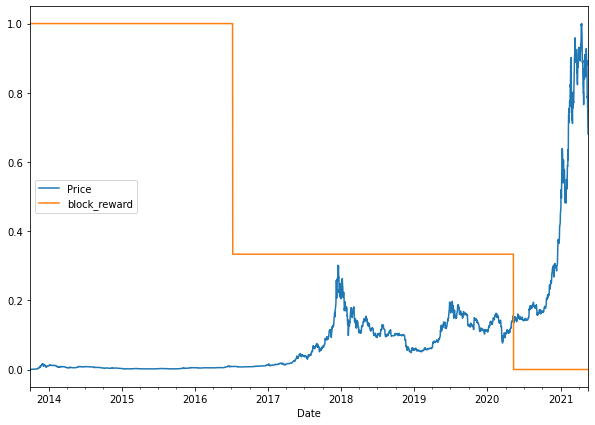

In [118]:
# Plot the block reward/price over time
# Note: Because of the different scales of our values we'll scale them to be between 0 and 1.
from sklearn.preprocessing import minmax_scale
scaled_price_block_df = pd.DataFrame(minmax_scale(bitcoin_prices_block[["Price", "block_reward"]]), # we need to scale the data first
                                     columns=bitcoin_prices_block.columns,
                                     index=bitcoin_prices_block.index)
scaled_price_block_df.plot(figsize=(10, 7));

In [119]:
# Setup dataset hyperparameters
HORIZON = 1
WINDOW_SIZE = 7

In [120]:
# Make a copy of the Bitcoin historical data with block reward feature
bitcoin_prices_windowed = bitcoin_prices_block.copy()

# Add windowed columns
for i in range(WINDOW_SIZE): # Shift values for each step in WINDOW_SIZE
  bitcoin_prices_windowed[f"Price+{i+1}"] = bitcoin_prices_windowed["Price"].shift(periods=i+1)
bitcoin_prices_windowed.head(10)

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2013-10-01,123.65499,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,25,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,25,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,25,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,25,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN
2013-10-06,120.65533,25,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN
2013-10-07,121.79500,25,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499,NaN
2013-10-08,123.03300,25,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499
2013-10-09,124.04900,25,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500


In [121]:
# Let's create X & y, remove the NaN's and convert to float32 to prevent TensorFlow errors 
X = bitcoin_prices_windowed.dropna().drop("Price", axis=1).astype(np.float32) 
y = bitcoin_prices_windowed.dropna()["Price"].astype(np.float32)
X.head()

,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2013-10-08,25.0,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002,123.654991
2013-10-09,25.0,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002
2013-10-10,25.0,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831
2013-10-11,25.0,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660
2013-10-12,25.0,125.279663,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661


In [122]:
# View labels
y.head()

Date
2013-10-08    123.032997
2013-10-09    124.049004
2013-10-10    125.961159
2013-10-11    125.279663
2013-10-12    125.927498
Name: Price, dtype: float32

In [123]:
# Make train and test sets
split_size = int(len(X) * 0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

(2224, 2224, 556, 556)

In [125]:
#model 7 Dense With Multivariate

In [126]:
tf.random.set_seed(42)

# Make multivariate time series model
model_7 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  # layers.Dense(128, activation="relu"), # adding an extra layer here should lead to beating the naive model
  layers.Dense(HORIZON)
], name="model_7_dense_multivariate")

# Compile
model_7.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Fit
model_7.fit(X_train, y_train,
            epochs=100,
            batch_size=128,
            verbose=0, # only print 1 line per epoch
            validation_data=(X_test, y_test),
            callbacks=[create_model_checkpoint(model_name=model_7.name)])

INFO:tensorflow:Assets written to: model_experiments/model_7_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_7_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_7_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_7_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_7_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_7_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_7_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_7_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_7_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_7_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_7_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_7_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_7_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_7_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_7_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_7_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_7_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_7_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_7_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_7_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_7_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_7_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_7_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_7_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_7_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_7_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_7_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_7_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_7_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_7_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_7_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_7_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_7_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_7_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_7_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_7_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_7_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_7_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_7_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_7_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_7_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_7_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_7_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_7_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_7_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_7_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_7_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_7_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_7_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_7_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_7_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_7_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_7_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_7_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_7_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_7_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_7_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_7_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_7_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_7_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_7_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_7_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_7_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_7_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_7_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_7_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_7_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_7_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_7_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_7_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_7_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_7_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_7_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_7_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_7_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_7_dense_multivariate/assets


In [127]:
# Make sure best model is loaded and evaluate
model_7 = tf.keras.models.load_model("model_experiments/model_7_dense_multivariate")
model_7.evaluate(X_test, y_test)

18/18 [==============================] - 0s 2ms/step - loss: 568.3355


568.3355102539062

In [128]:
# Make predictions on multivariate data
model_7_preds = tf.squeeze(model_7.predict(X_test))
model_7_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8845.381 , 8769.115 , 9044.852 , 8745.515 , 8727.0625, 8773.182 ,
       8669.289 , 8502.578 , 8469.248 , 8527.997 ], dtype=float32)>

In [129]:
# Evaluate preds
model_7_results = evaluate_preds(y_true=y_test,
                                 y_pred=model_7_preds)
model_7_results

{'mae': 568.33545,
 'mape': 2.5493133,
 'mase': 0.99840796,
 'mse': 1164860.0,
 'rmse': 1079.2867}

In [130]:
model_1_results

{'mae': 568.5498,
 'mape': 2.549229,
 'mase': 0.99878454,
 'mse': 1172587.6,
 'rmse': 1082.8608}

In [132]:
naive_results

{'mae': 567.9802,
 'mape': 2.5165248,
 'mase': 0.99957,
 'mse': 1147547.0,
 'rmse': 1071.2362}

SOTA NBEATS

In [133]:
# Create NBeatsBlock custom layer 
class NBeatsBlock(tf.keras.layers.Layer):
  def __init__(self, # the constructor takes all the hyperparameters for the layer
               input_size: int,
               theta_size: int,
               horizon: int,
               n_neurons: int,
               n_layers: int,
               **kwargs): # the **kwargs argument takes care of all of the arguments for the parent class (input_shape, trainable, name)
    super().__init__(**kwargs)
    self.input_size = input_size
    self.theta_size = theta_size
    self.horizon = horizon
    self.n_neurons = n_neurons
    self.n_layers = n_layers

    # Block contains stack of 4 fully connected layers each has ReLU activation
    self.hidden = [tf.keras.layers.Dense(n_neurons, activation="relu") for _ in range(n_layers)]
    # Output of block is a theta layer with linear activation
    self.theta_layer = tf.keras.layers.Dense(theta_size, activation="linear", name="theta")

  def call(self, inputs): # the call method is what runs when the layer is called 
    x = inputs 
    for layer in self.hidden: # pass inputs through each hidden layer 
      x = layer(x)
    theta = self.theta_layer(x) 
    # Output the backcast and forecast from theta
    backcast, forecast = theta[:, :self.input_size], theta[:, -self.horizon:]
    return backcast, forecast

In [134]:
# Set up dummy NBeatsBlock layer to represent inputs and outputs
dummy_nbeats_block_layer = NBeatsBlock(input_size=WINDOW_SIZE, 
                                       theta_size=WINDOW_SIZE+HORIZON, # backcast + forecast 
                                       horizon=HORIZON,
                                       n_neurons=128,
                                       n_layers=4)

In [135]:
# Create dummy inputs (have to be same size as input_size)
dummy_inputs = tf.expand_dims(tf.range(WINDOW_SIZE) + 1, axis=0) # input shape to the model has to reflect Dense layer input requirements (ndim=2)
dummy_inputs

<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[1, 2, 3, 4, 5, 6, 7]], dtype=int32)>

In [136]:
# Pass dummy inputs to dummy NBeatsBlock layer
backcast, forecast = dummy_nbeats_block_layer(dummy_inputs)
# These are the activation outputs of the theta layer (they'll be random due to no training of the model)
print(f"Backcast: {tf.squeeze(backcast.numpy())}")
print(f"Forecast: {tf.squeeze(forecast.numpy())}")

Backcast: [ 0.19014983  0.8379835  -0.32870027  0.25159904 -0.47540277 -0.7783665
 -0.5299448 ]
Forecast: -0.7554212808609009


In [137]:
HORIZON = 1 # how far to predict forward
WINDOW_SIZE = 7 # how far to lookback

In [138]:
# Create NBEATS data inputs (NBEATS works with univariate time series)
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [139]:
# Add windowed columns
bitcoin_prices_nbeats = bitcoin_prices.copy()
for i in range(WINDOW_SIZE):
  bitcoin_prices_nbeats[f"Price+{i+1}"] = bitcoin_prices_nbeats["Price"].shift(periods=i+1)
bitcoin_prices_nbeats.dropna().head()

,Price,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2013-10-08,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499
2013-10-09,124.04900,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500
2013-10-10,125.96116,124.04900,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483
2013-10-11,125.27966,125.96116,124.04900,123.03300,121.79500,120.65533,121.33866,118.67466
2013-10-12,125.92750,125.27966,125.96116,124.04900,123.03300,121.79500,120.65533,121.33866


In [140]:
# Make features and labels
X = bitcoin_prices_nbeats.dropna().drop("Price", axis=1)
y = bitcoin_prices_nbeats.dropna()["Price"]

# Make train and test sets
split_size = int(len(X) * 0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

(2224, 2224, 556, 556)

In [141]:
# 1. Turn train and test arrays into tensor Datasets
train_features_dataset = tf.data.Dataset.from_tensor_slices(X_train)
train_labels_dataset = tf.data.Dataset.from_tensor_slices(y_train)

test_features_dataset = tf.data.Dataset.from_tensor_slices(X_test)
test_labels_dataset = tf.data.Dataset.from_tensor_slices(y_test)

# 2. Combine features & labels
train_dataset = tf.data.Dataset.zip((train_features_dataset, train_labels_dataset))
test_dataset = tf.data.Dataset.zip((test_features_dataset, test_labels_dataset))

# 3. Batch and prefetch for optimal performance
BATCH_SIZE = 1024 # taken from Appendix D in N-BEATS paper
train_dataset = train_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

train_dataset, test_dataset

(<PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>,
 <PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>)

In [142]:
# Values from N-BEATS paper Figure 1 and Table 18/Appendix D
N_EPOCHS = 5000 # called "Iterations" in Table 18
N_NEURONS = 512 # called "Width" in Table 18
N_LAYERS = 4
N_STACKS = 30

INPUT_SIZE = WINDOW_SIZE * HORIZON # called "Lookback" in Table 18
THETA_SIZE = INPUT_SIZE + HORIZON

INPUT_SIZE, THETA_SIZE

(7, 8)

In [143]:
# Make tensors
tensor_1 = tf.range(10) + 10
tensor_2 = tf.range(10)

# Subtract
subtracted = layers.subtract([tensor_1, tensor_2])

# Add
added = layers.add([tensor_1, tensor_2])

print(f"Input tensors: {tensor_1.numpy()} & {tensor_2.numpy()}")
print(f"Subtracted: {subtracted.numpy()}")
print(f"Added: {added.numpy()}")

Input tensors: [10 11 12 13 14 15 16 17 18 19] & [0 1 2 3 4 5 6 7 8 9]
Subtracted: [10 10 10 10 10 10 10 10 10 10]
Added: [10 12 14 16 18 20 22 24 26 28]


In [ ]:
 %%time

tf.random.set_seed(42)

# 1. Setup N-BEATS Block layer
nbeats_block_layer = NBeatsBlock(input_size=INPUT_SIZE,
                                 theta_size=THETA_SIZE,
                                 horizon=HORIZON,
                                 n_neurons=N_NEURONS,
                                 n_layers=N_LAYERS,
                                 name="InitialBlock")

# 2. Create input to stacks
stack_input = layers.Input(shape=(INPUT_SIZE), name="stack_input")

# 3. Create initial backcast and forecast input (backwards predictions are referred to as residuals in the paper)
backcast, forecast = nbeats_block_layer(stack_input)
# Add in subtraction residual link, thank you to: https://github.com/mrdbourke/tensorflow-deep-learning/discussions/174 
residuals = layers.subtract([stack_input, backcast], name=f"subtract_00") 

# 4. Create stacks of blocks
for i, _ in enumerate(range(N_STACKS-1)): # first stack is already creted in (3)

  # 5. Use the NBeatsBlock to calculate the backcast as well as block forecast
  backcast, block_forecast = NBeatsBlock(
      input_size=INPUT_SIZE,
      theta_size=THETA_SIZE,
      horizon=HORIZON,
      n_neurons=N_NEURONS,
      n_layers=N_LAYERS,
      name=f"NBeatsBlock_{i}"
  )(residuals) # pass it in residuals (the backcast)

  # 6. Create the double residual stacking
  residuals = layers.subtract([residuals, backcast], name=f"subtract_{i}") 
  forecast = layers.add([forecast, block_forecast], name=f"add_{i}")

# 7. Put the stack model together
model_7 = tf.keras.Model(inputs=stack_input, 
                         outputs=forecast, 
                         name="model_7_N-BEATS")

# 8. Compile with MAE loss and Adam optimizer
model_7.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(0.001),
                metrics=["mae", "mse"])

# 9. Fit the model with EarlyStopping and ReduceLROnPlateau callbacks
model_7.fit(train_dataset,
            epochs=N_EPOCHS,
            validation_data=test_dataset,
            verbose=0, # prevent large amounts of training outputs
            # callbacks=[create_model_checkpoint(model_name=stack_model.name)] # saving model every epoch consumes far too much time
            callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=200, restore_best_weights=True),
                      tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", patience=100, verbose=1)])

In [ ]:
# Evaluate N-BEATS model on the test dataset
model_7.evaluate(test_dataset)

In [ ]:
# Make predictions with N-BEATS model
model_7_preds = make_preds(model_7, test_dataset)
model_7_preds[:10]

In [ ]:
# Evaluate N-BEATS model predictions
model_7_results = evaluate_preds(y_true=y_test,
                                 y_pred=model_7_preds)
model_7_results

In [ ]:
# Evaluate N-BEATS model predictions
model_7_results = evaluate_preds(y_true=y_test,
                                 y_pred=model_7_preds)
model_7_results

In [ ]:
#ARGGGGG